In [8]:
import numpy as np
from pykrige.ok import OrdinaryKriging
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df= pd.read_csv('VN2000 - WGS84.csv')

lats = df['WGS84 - Lat']
lons = df['WGS84 - Long']

df1 = pd.read_csv('output.csv')
predic_value= df1['Predicted_Value']
df2 = pd.read_csv("QHoa.csv")
actual_value = df2['Giadat'] 

lats= lats.values
lons= lons.values
predic_value =predic_value.values
actual_value = actual_value.values
error =predic_value - actual_value 
abs_error = abs(error)
max_error = max(abs_error)
standard_error = error/max_error
print(standard_error)
#uncertainty analysis


[ 0.40534754 -0.53810698 -0.25970442 -0.60884915 -0.86385194  0.50027391
 -0.05508728  0.45470131 -0.20305701  0.47319382 -0.19535059 -0.04177431
 -0.38891587  0.10631385 -0.79599948 -0.08032469 -1.          0.23961941
 -0.73843312  0.10399359  0.40522386  0.09104862 -0.41942988 -0.25524789
  0.38333216 -0.61174409  0.02251256 -0.52053655 -0.14286565  0.26547451
 -0.24930746  0.52741461 -0.01827706  0.65408689 -0.82241246  0.32880762
  0.72194758  0.7297554   0.36773426  0.55731147  0.10835866 -0.32981917
  0.21078054  0.47693514  0.04640513  0.10173298 -0.46453699  0.32735108
  0.04387533  0.69416136 -0.05101537  0.5213835  -0.73682303  0.62915851
  0.20357735  0.13367287  0.10138266  0.13317152  0.08331221  0.10080298
  0.05507622  0.18824956 -0.14023229]


Text(0, 0.5, 'Longtitude')

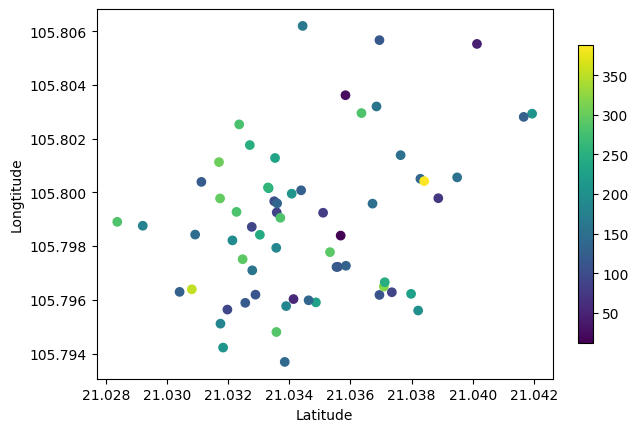

In [29]:
polar_color_scale = plt.cm.seismic
#cax =plt.scatter(lats,lons,c = standard_error, cmap=polar_color_scale vmin= -1, vmax= 1)
cax = plt.scatter(lats,lons, c= predic_value)
cbar = plt.colorbar(cax,fraction =0.03)
plt.xlabel('Latitude')
plt.ylabel('Longtitude')

In [51]:
OK = OrdinaryKriging(
    lats,
    lons,
    standard_error,
    variogram_model ='exponential',
    verbose = False,
    enable_plotting= False
)

In [52]:
#plotting
min_lon = min(lons)
min_lat = min(lats)
max_lon = max(lons)
max_lat = max(lats)
grid_space = 0.0001
        
grid_lon = np.arange(min_lon+0.0001,max_lon, grid_space) 
grid_lat = np.arange(min_lat+0.0001, max_lat, grid_space)
z_value, variance = OK.execute('grid', grid_lat, grid_lon)

print ("z-values = ", z_value)
print ("variance = ", variance)

z-values =  [[0.012981785396161368 0.01330968096726237 0.013717586821478249 ...
  0.009758733594226448 0.009997993802752656 0.01021147965993848]
 [0.012711990412426759 0.013014224535869744 0.013398022029605355 ...
  0.009629967248507657 0.00988589099280141 0.010113862342710446]
 [0.012393175060341467 0.012660797750876118 0.013010598220092217 ...
  0.009500000195521316 0.009772862037255171 0.01001552955976479]
 ...
 [0.01224595909951836 0.012276382183637184 0.012309432792866337 ...
  -0.05685576829660096 -0.04782018349646817 -0.03984543488674715]
 [0.012217373626684399 0.012245140432553515 0.012275297822720143 ...
  -0.05454992123452214 -0.04603850868358222 -0.038494495377503116]
 [0.012191273182732826 0.012216642315193678 0.012244193903047203 ...
  -0.05179072527346747 -0.043848604470616774 -0.03677601203072584]]
variance =  [[0.1955031325886878 0.19544232839459458 0.19537375447882968 ...
  0.19591348168240563 0.19592469590043776 0.1959346256307973]
 [0.1954610909341044 0.1953947661659

In [53]:
print(z_value.shape)
print(variance.shape)
print(min_lat)
print(max_lat)
print(min_lon)
print(max_lon)

(125, 135)
(125, 135)
21.028374
21.041941
105.793688
105.806198


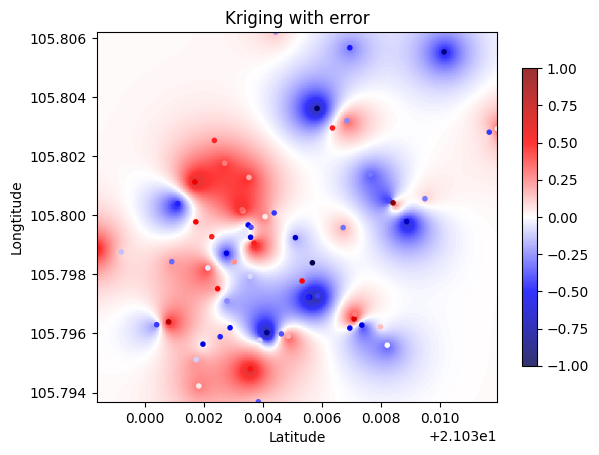

In [54]:

cax=plt.imshow(z_value ,extent=(min_lat,max_lat, min_lon, max_lon), origin='lower', cmap = polar_color_scale, vmin= -1, vmax= 1, alpha=0.8)
#cax=plt.imshow(z_value ,extent=(min_lat,max_lat, min_lon, max_lon), origin='lower', alpha=0.8)
plt.scatter(lats,lons,c =predic_value, cmap= polar_color_scale, marker='.')
#plt.scatter(lats,lons,c =predic_value, marker='x')
cbar = plt.colorbar(cax,fraction =0.03)
plt.xlabel("Latitude")
plt.ylabel("Longtitude")
plt.title("Kriging with error")
plt.show()


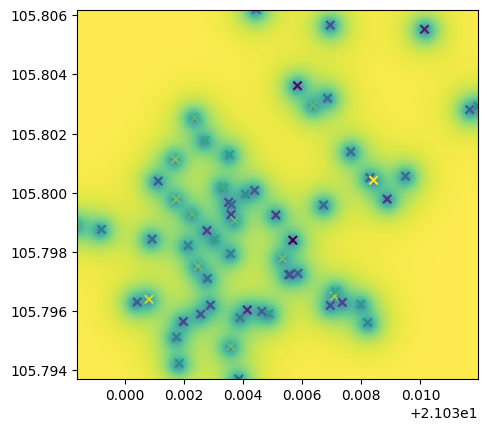

<Figure size 640x480 with 0 Axes>

In [55]:
cax = plt.imshow(np.sqrt(variance),extent=(min_lat,max_lat, min_lon, max_lon), origin='lower', alpha=0.8)
plt.scatter(lats,lons,c =predic_value,marker='x')
plt.show()
cbar = plt.colorbar(cax)